In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

C:\Users\parul\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#set working directory
os.chdir("C:/Users/parul/Desktop/Data Science/PROJECT/project1")

In [3]:
os.getcwd()

'C:\\Users\\parul\\Desktop\\Data Science\\PROJECT\\project1'

In [4]:
#Load train and test data
train=pd.read_csv("Train_data.csv")
test=pd.read_csv("Test_data.csv")

In [5]:
#create new variable to identify train and test dataset post data manipulations
train['isTrain']=1
test['isTrain']=0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [7]:
#combined data with both train and test dataset
data=train.append(test)
data.shape


(5000, 22)

In [8]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn,isTrain
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,1


<h2>Preparing and Cleaning data</h2>

In [9]:
#check missing values in the dataframe
missing_val = pd.DataFrame(data.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val

,Variables,Missing_percentage
0,state,0
1,account length,0
2,area code,0
3,phone number,0
4,international plan,0
5,voice mail plan,0
6,number vmail messages,0
7,total day minutes,0
8,total day calls,0
9,total day charge,0


<h2>Data Exploration and Visualization</h2>

In [10]:
#Data exploration
state_val=data['state'].nunique()
accountlen_val=data['account length'].nunique()
areacode_val=data['area code'].nunique()
phnum_val=data['phone number'].nunique()
intlplan_val=data['international plan'].nunique()
vmplan_val=data['voice mail plan'].nunique()
vmmsg_val=data['number vmail messages'].nunique()
daymin_val=data['total day minutes'].nunique()
daycalls_val=data['total day calls'].nunique()
daycharge_val=data['total day charge'].nunique()
custservicecall_val=data['number customer service calls'].nunique()

 False.    4293
 True.      707
Name: Churn, dtype: int64


Text(0, 0.5, 'Customer Count')

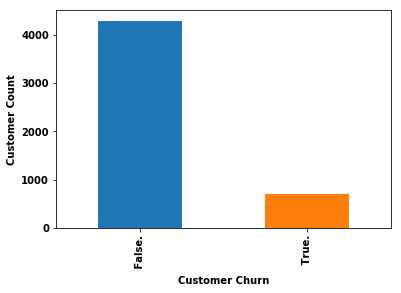

In [11]:
#Visualization of target columnn
print(data.Churn.value_counts())
plt = data.Churn.value_counts().plot('bar')
plt.set_xlabel('Customer Churn')
plt.set_ylabel('Customer Count')
#Data is imbalanced. Less number of customers churn

In [12]:
print('Proportion:', round(4293 / 707, 2), ': 1')

Proportion: 6.07 : 1


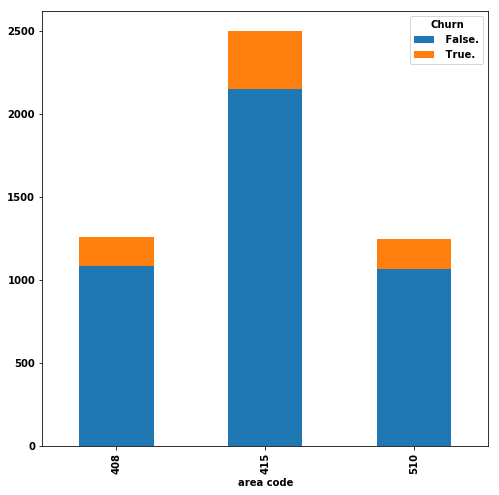

In [13]:
#Analysis of Categorical predictors using Visualization
#effect of area code on Churn
areacode_vs_churn=pd.crosstab(index=data["area code"], 
                           columns=data["Churn"])
#Visualization
areacode_vs_churn.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


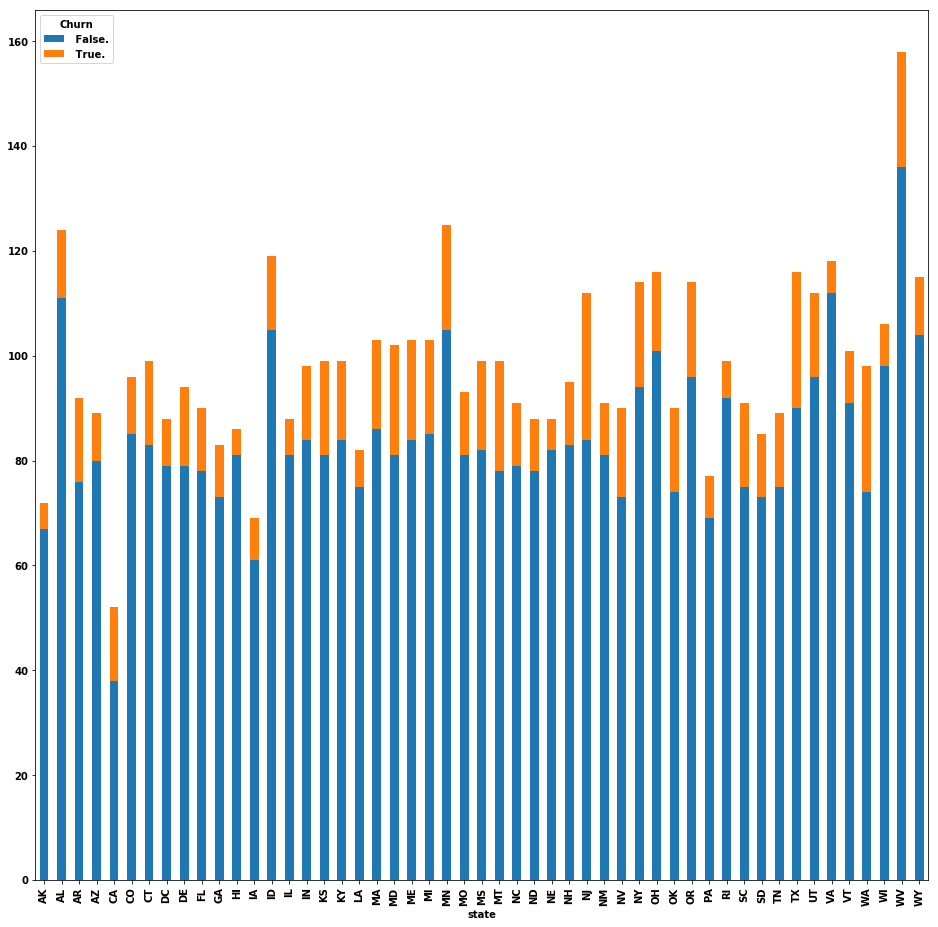

In [14]:
#effect of state on Churn
state_vs_churn=pd.crosstab(index=data["state"], 
                           columns=data["Churn"])
#Visualization
state_vs_churn.plot(kind="bar", 
                 figsize=(16,16),
                 stacked=True)


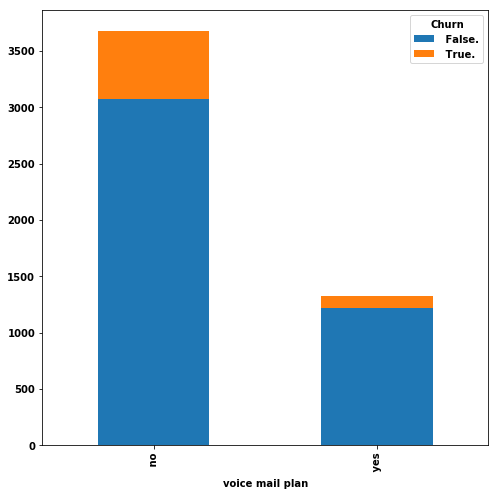

In [15]:
#effect of voice plan on Churn
voiceplan_vs_churn=pd.crosstab(index=data["voice mail plan"], 
                           columns=data["Churn"])
#Visualization
voiceplan_vs_churn.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

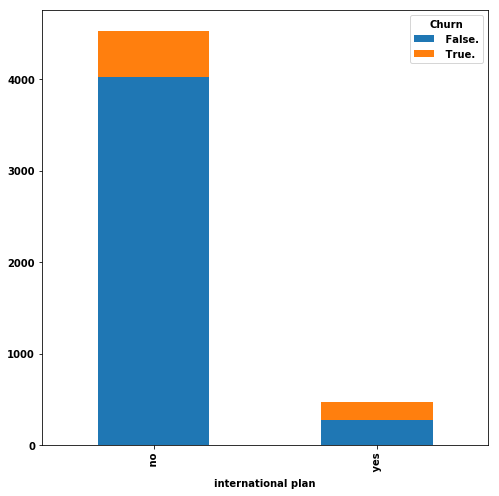

In [16]:
#effect of international plan on Churn
intlplan_vs_churn=pd.crosstab(index=data["international plan"], 
                           columns=data["Churn"])
#Visualization
intlplan_vs_churn.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


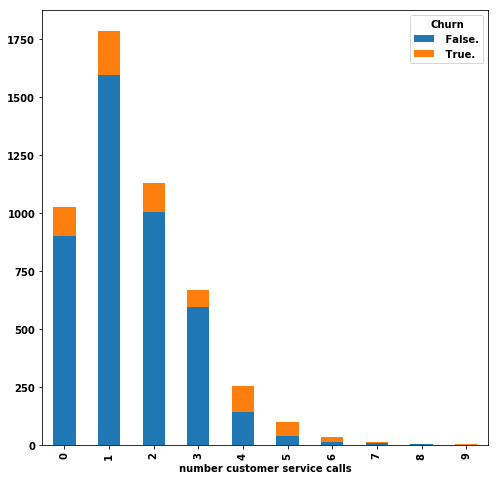

In [17]:
#effect of number of service calls on Churn
servicecall_vs_churn=pd.crosstab(index=data["number customer service calls"], 
                           columns=data["Churn"])
servicecall_vs_churn
servicecall_vs_churn.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [20]:
print(data.Churn.value_counts())

 False.    4293
 True.      707
Name: Churn, dtype: int64


<h4>Outlier Analysis</h4>

In [ ]:
#Since the case involves churn prediction, outliers provide some imporatt insights in predicting the minority class.
#Hence we are not removing outliers from the data.

In [ ]:
#Else we may remove the outliers as:
#capping and flooring
#nncol=['number vmail messages','account length','total day minutes','total day charge','total eve charge','total night charge','total intl charge','total day calls','total eve minutes','total eve calls','total night minutes','total night calls','total intl minutes','total intl calls','number customer service calls']
#for i in nncol:
 #   print(i)
  #  q75, q25= np.percentile(data.loc[:,i], [75 ,25])
   # iqr = q75 - q25
   # min = q25 - (iqr*1.5)
    #max = q75 + (iqr*1.5)
    #print(min)
    #print(max)
    #data.loc[data[i] < min,:i] = min
    #data.loc[data[i] > max,:i] = max

    

In [21]:
print(data.isTrain.value_counts())

1    3333
0    1667
Name: isTrain, dtype: int64


<h2>Feature Selection</h2>

In [22]:
#Correlation analysis
#numcol holds the names of numeric variables
num_columns=data.select_dtypes(exclude=['object','bool'])
numcol=num_columns.columns
numcol
#data[numcol].head()

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'isTrain'],
      dtype='object')

In [23]:
type(num_columns)

pandas.core.frame.DataFrame

In [24]:
def heatMap(df):
    #Create Correlation df
    corr_matrix = df.corr()
    #Plot figsize
    fig,ax =plt.subplots(figsize=(12, 10))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    #Apply yticks
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    #show plot
    plt.show()
    return corr_matrix

In [25]:
corr_matrix=heatMap(data[numcol])
#shows there exists high correlation between
#a)total day minutes and  total day charge
#b)total eve minutes and total eve charge
#c)total night minutes and total night charge
#d)total international minutes and total international charge

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

In [26]:
#OR to show heatmap....matplotlib causing errors
#corr_matrix = data[numcol].corr()
#fig,ax =plt.subplots(figsize=(12, 10))
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(corr_matrix, cmap=colormap,annot=True, fmt=".2f")
#plt.show

In [27]:
# Select upper triangle of correlation matrix
corr_matrix = data[numcol].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [28]:
to_drop

['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

In [29]:
#chi-square test
#cat_names hold categorical variables
cat_names=['state','area code','international plan','voice mail plan']
cat_data=data[cat_names]

In [30]:
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['Churn'], data[i]))
    print(p)

state
7.850836224371827e-05
area code
0.7546581385329686
international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


In [31]:
#drop the categorical variable for which p-value> 0.05
#Null hypo, H0: predictor and target variable are independent
#Reject H0 when p-value <0.05 (alpha value), hence select (drop) those variables for which p-value<0.05 
#Drop phone number as it is an irrelevant variable for churn prediction
drop_var=['area code','phone number']+to_drop
#drop_var

In [32]:
#drop redundant variables
data_copy=data.copy()
data = data.drop(drop_var, axis=1)

In [33]:
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn,isTrain
0,KS,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.,1
1,OH,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.,1
2,NJ,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.,1
3,OH,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.,1
4,OK,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.,1


In [34]:
data.shape

(5000, 16)

In [35]:
#explore categorical variables to convert them to numeric labels to feed them to ML algorithms
cols=['state','international plan','voice mail plan']
for name in cols:
    print(name,':')
    print(data[name].value_counts(),'\n')

state :
WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
OR    114
NY    114
NJ    112
UT    112
WI    106
MA    103
MI    103
ME    103
MD    102
VT    101
MT     99
MS     99
RI     99
KY     99
KS     99
CT     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
SC     91
NC     91
OK     90
NV     90
FL     90
AZ     89
TN     89
NE     88
IL     88
DC     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64 

international plan :
 no     4527
 yes     473
Name: international plan, dtype: int64 

voice mail plan :
 no     3677
 yes    1323
Name: voice mail plan, dtype: int64 



In [36]:
#drop variable state as it has numerous levels
data=data.drop(['state'],axis=1)
data.shape

(5000, 15)

In [37]:
#assign numeric labels to categorical variables: international plan and voice mail plan
num=LabelEncoder()
data['international plan']=num.fit_transform(data['international plan'].astype('str'))
data['voice mail plan']=num.fit_transform(data['voice mail plan'].astype('str'))
#numeric labels are avoided as they generate labels that have an order like 0,1,2 which affects the model

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 15 columns):
account length                   5000 non-null int64
international plan               5000 non-null int64
voice mail plan                  5000 non-null int64
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total intl minutes               5000 non-null float64
total intl calls                 5000 non-null int64
number customer service calls    5000 non-null int64
Churn                            5000 non-null object
isTrain                          5000 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 625.0+ KB


In [40]:
#numeric labels are avoided as they generate labels that have an order like 0,1,2 which affects the model in case of multiple categories
#create dummy variables for categorical variables to convert them into numeric type
#However we have binary classes so we can use Label Encoding method as well
#categorical=['international plan','voice mail plan']
#for i in categorical:
#    temp = pd.get_dummies(data[i], prefix = i)
#    data = data.join(temp)

In [41]:
#assign numeric label to target variable using Label Encoder
data['Churn']=num.fit_transform(data['Churn'].astype('str'))

In [42]:
data['Churn'].value_counts()

0    4293
1     707
Name: Churn, dtype: int64

In [43]:
#create a copy of data to be used later
datacopy=data

<h4>Solving target class imbalanced problem</h4>

In [ ]:
#WE ACTALLY CARE ABOUT FALSE NEGATIVE RATE, SENSTIVITY,RECALL

In [49]:
#Separate train and test data
data=datacopy
train=data.loc[(data['isTrain'])==1]
test=data.loc[(data['isTrain'])==0]


In [50]:
train.shape

(3333, 15)

In [51]:
print(train.Churn.value_counts())

0    2850
1     483
Name: Churn, dtype: int64


Random under-sampling:
1    707
0    707
Name: Churn, dtype: int64


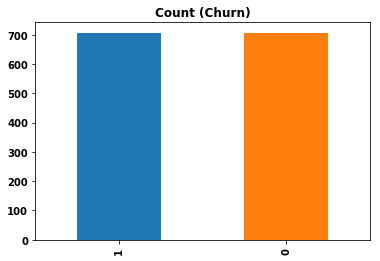

In [52]:
#method 1:Random Under sampling (perfomed on whole data so that train:test ratio not disturbed)

# Class count
count_class_0, count_class_1 = data.Churn.value_counts()

# Divide by class
data_class_0 = data[data['Churn'] == 0]
data_class_1 = data[data['Churn'] == 1]

data_class_0_under = data_class_0.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

print('Random under-sampling:')
print(data_test_under.Churn.value_counts())
data_test_under.Churn.value_counts().plot(kind='bar', title='Count (Churn)');

#Now replace data with re-sampled data
data=pd.DataFrame(data_test_under)

Random over-sampling:
1    2850
0    2850
Name: Churn, dtype: int64


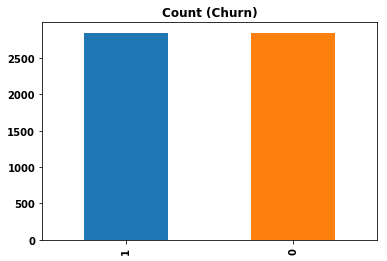

In [48]:
#Method 2: Random over sampling (performed only on train data to avoid overfitting)
#Load original data
data=datacopy
# Class count
count_class_0, count_class_1 = train.Churn.value_counts()

# Divide by class
data_class_0 = train[train['Churn'] == 0]
data_class_1 = train[train['Churn'] == 1]
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_test_over.Churn.value_counts())
data_test_over.Churn.value_counts().plot(kind='bar', title='Count (Churn)');

#replace data with new sample and perform all the steps for classification
train=pd.DataFrame(data_test_over)
data=train.append(test)

Removed indexes: [   0    1    2 ... 4997 4998 4999]
0    4088
1     707
Name: Churn, dtype: int64


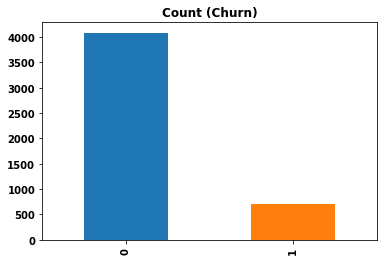

In [95]:
#method 3: Undersampling using Tomek links (performed on whole data)
#load original data first
data=datacopy
cols=list(data.columns)
cols1=cols.copy()
cols1.remove('Churn')
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X=data[cols1]
y=data['Churn']
X_tl, y_tl, id_tl = tl.fit_sample(X, y)
X_Tl=pd.DataFrame(data=X_tl,columns=cols1)
y_Tl=pd.DataFrame(data=y_tl,columns=['Churn'])
data=pd.concat([X_Tl,y_Tl],axis=1,sort=True)
print('Removed indexes:', id_tl)
print(data.Churn.value_counts())
data.Churn.value_counts().plot(kind='bar', title='Count (Churn)');

In [ ]:
#method 4: SMOTE over sampling (performed only on train data)
#load original data first
data=datacopy
from imblearn.over_sampling import SMOTE
cols=list(train.columns)
cols1=cols.copy()
cols1.remove('Churn')

X=train[cols1]
y=train['Churn']

smote = SMOTE(ratio='minority',kind = "regular")
X_sm, y_sm = smote.fit_sample(X, y)
X_Sm=pd.DataFrame(data=X_sm,columns=cols1)

X_Sm['international plan']=np.round(X_Sm['international plan'])
X_Sm['voice mail plan']=np.round(X_Sm['voice mail plan'])
y_Sm=pd.DataFrame(data=y_sm,columns=['Churn'])
train=pd.concat([X_Sm, y_Sm],axis=1,sort=True)

#generate complete data after resampling train data by combining with test data
data=train.append(test,sort=True)
#reorder columns
data = data.reindex(columns= cols)

print('Tomek-links under-sampling:')
print(data.Churn.value_counts())

data.Churn.value_counts().plot(kind='bar', title='Count (Churn)');

In [ ]:
#Method 5: Combining SMOTE (oversampling) and TOMEK LINKS (undersampling)
data=datacopy
from imblearn.combine import SMOTETomek

cols=list(train.columns)
cols1=cols.copy()
#cols1.remove('isTrain')
cols1.remove('Churn')

X=train[cols1]
y=train['Churn']
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)
X_Smt=pd.DataFrame(data=X_smt,columns=cols1)

X_Smt['international plan']=np.round(X_Smt['international plan'])
X_Smt['voice mail plan']=np.round(X_Smt['voice mail plan'])
y_Smt=pd.DataFrame(data=y_smt,columns=['Churn'])
train=pd.concat([X_Smt, y_Smt],axis=1,sort=True)
#generate complete data after resampling train data by combining with test data
data=train.append(test,sort=True)
#reorder columns
data = data.reindex(columns= cols)

print('SMOTE over-sampling:')
print(data.Churn.value_counts())

data.Churn.value_counts().plot(kind='bar', title='Count (Churn)');

<h4> Feature Scaling </h4>


In [53]:
#Check feature normality
#account length
#plt.hist(data['account length'], bins='auto')
#OR
#data.hist(column='account length',bins='auto')
#OR
#sns.distplot(data['account length'], bins='auto',kde=True)
#data['account length'].describe()

C:\Users\parul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\parul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\parul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\parul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


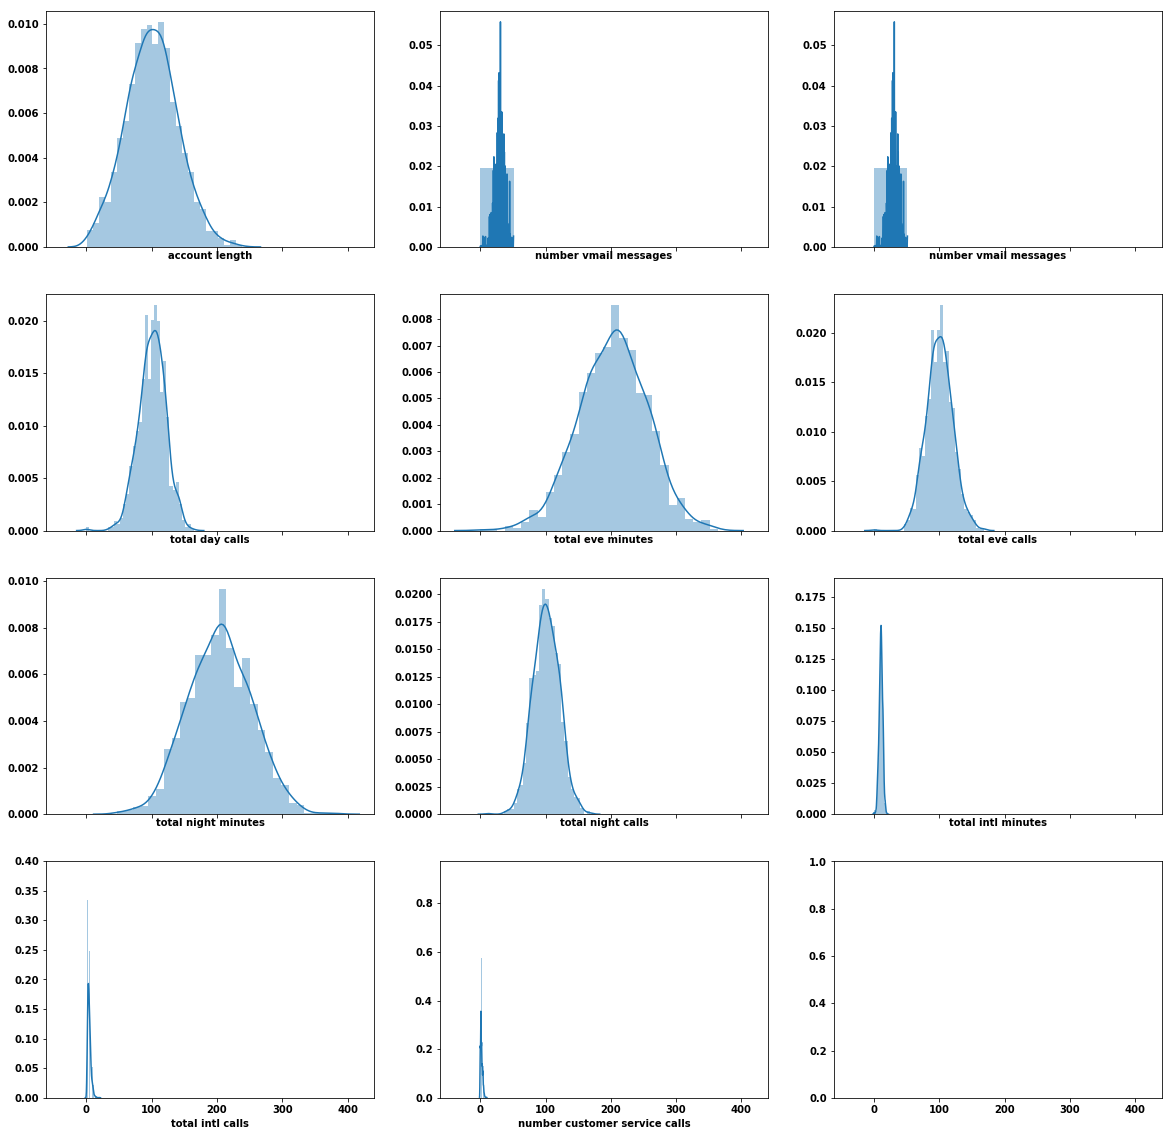

In [54]:
import matplotlib.pyplot as plt
#Check feature normality
f, axes = plt.subplots(4, 3, figsize=(20, 20), sharex=True)
#account length
sns.distplot(data['account length'], bins='auto',kde=True,ax=axes[0, 0])
#number vmail messages
sns.distplot(data['number vmail messages'], bins='auto',ax=axes[0, 1])
#total day minutes
sns.distplot(data['number vmail messages'], bins='auto',ax=axes[0, 2])
#total day calls
sns.distplot(data['total day calls'], bins='auto',ax=axes[1, 0])
#total eve minutes
sns.distplot(data['total eve minutes'], bins='auto',ax=axes[1, 1])
#total eve calls
sns.distplot(data['total eve calls'], bins='auto',ax=axes[1, 2])
#total night minutes
sns.distplot(data['total night minutes'], bins='auto',ax=axes[2, 0])
#total night calls
sns.distplot(data['total night calls'], bins='auto',ax=axes[2, 1])
#total international minutes
sns.distplot(data['total intl minutes'], bins='auto',ax=axes[2, 2])
#total international calls
sns.distplot(data['total intl calls'], bins='auto',ax=axes[3, 0])
#number customer service calls
sns.distplot(data['number customer service calls'], bins='auto',ax=axes[3, 1])

In [55]:
#store normaly distributed variables separately and apply standardization and apply normalization on the remaining variables
#standardization
#normvar=['account length','total day minutes','total day calls','total eve minutes','total eve calls','total night minutes','total night calls','total intl minutes','total intl calls']
#for i in normvar:
 #   print(i)
  #  data[i] = (data[i] - data[i].mean())/data[i].std()

In [96]:
#feature scaling by normalization
#notnorm=['number vmail messages','number customer service calls']
notnorm=['number vmail messages','account length','total day minutes','total day calls','total eve minutes','total eve calls','total night minutes','total night calls','total intl minutes','total intl calls','number customer service calls']
for i in notnorm:
    print(i)
    data[i] = (data[i] - min(data[i]))/(max(data[i]) - min(data[i]))

number vmail messages
account length
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
number customer service calls


<h2>Classification</h2>

In [97]:
#Let us consider the Churn Class "False" as the -ve class (label:0)
#and the churn class "true" as +ve class(Label:1)
#We will analyse the False negative rate 
#False -ve rate is imp bcoz we donot want the customers that will churn to be classified as customers who will not churn
#This way we will lose the chance to prevent the customers from leaving.

In [98]:
#We want a considerably good acuracy but a low false negative rate and high senstivity

In [99]:
#divide data into train and test
train_data=data.loc[(data['isTrain'])==1]
train_data=train_data.drop('isTrain',1)
test_data=data.loc[(data['isTrain'])==0]
test_data=test_data.drop('isTrain',1)

#store predictor and target variable separately for train and test data
X_train=train_data.drop('Churn',1)
Y_train=train_data.Churn
X_test=test_data.drop('Churn',1)
Y_test=test_data.Churn

In [100]:
print(data.isTrain.value_counts())

1.0    3193
0.0    1602
Name: isTrain, dtype: int64


<h4>Decision Tree</h4>

In [101]:
# decision tree classification
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
#predict new test cases
C50_Predictions = C50_model.predict(X_test)
CM = pd.crosstab(Y_test, C50_Predictions)

In [102]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

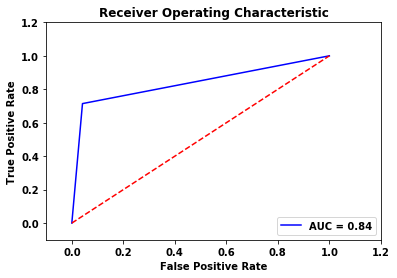

In [103]:
#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, C50_Predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
print("ERROR METRICS")
#False Negative rate 
print("FALSE NEGATIVE RATE  :%10.2f"%((FN*100)/(FN+TP)),"%")
#accuracy
print("ACCURACY             :%10.2f"%(((TP+TN)*100)/(TP+TN+FP+FN)),"%")
#senstivity: proportion of actual positives that are correctly classified
print("SENSTIVITY           :%10.2f"%(TP*100/(TP+FN)),"%")
#specificity
print("SPECIFICITY          :%10.2f"%(TN*100/(TN+FP)),"%")
#precision
print("PRECISION            :%10.2f"%(TP*100/(TP+FP)),"%")
#recall
print("RECALL               :%10.2f"%(TP*100/(TP+FN)),"%")
#ROC-AUC
print("ROC-AUC              :%10.2f"%(roc_auc*100),"%")

ERROR METRICS
FALSE NEGATIVE RATE  :     28.57 %
ACCURACY             :     92.45 %
SENSTIVITY           :     71.43 %
SPECIFICITY          :     95.86 %
PRECISION            :     73.73 %
RECALL               :     71.43 %
ROC-AUC              :     83.65 %


<h4>Random Forest</h4>

In [105]:
#random forest
RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, Y_train)
RF_Predictions = RF_model.predict(X_test)
CM = pd.crosstab(Y_test, RF_Predictions)
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

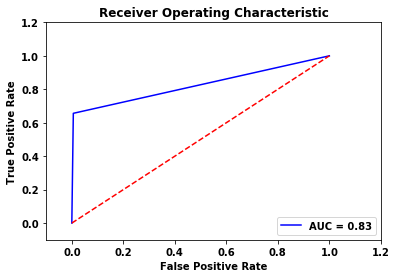

In [106]:
#roc-auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, RF_Predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
print("ERROR METRICS")
#False Negative rate 
print("FALSE NEGATIVE RATE  :%10.2f"%((FN*100)/(FN+TP)),"%")
#accuracy
print("ACCURACY             :%10.2f"%(((TP+TN)*100)/(TP+TN+FP+FN)),"%")
#senstivity: proportion of actual positives that are correctly classified
print("SENSTIVITY           :%10.2f"%(TP*100/(TP+FN)),"%")
#specificity
print("SPECIFICITY          :%10.2f"%(TN*100/(TN+FP)),"%")
#precision
print("PRECISION            :%10.2f"%(TP*100/(TP+FP)),"%")
#recall
print("RECALL               :%10.2f"%(TP*100/(TP+FN)),"%")
#ROC-AUC
print("ROC-AUC              :%10.2f"%(roc_auc*100),"%")

ERROR METRICS
FALSE NEGATIVE RATE  :     34.38 %
ACCURACY             :     94.69 %
SENSTIVITY           :     65.62 %
SPECIFICITY          :     99.42 %
PRECISION            :     94.84 %
RECALL               :     65.62 %
ROC-AUC              :     82.52 %


<h4>Logistic Regression</h4>

In [108]:
#create copy of the data before processing data for Logistic Regression
data2=data.copy()


In [109]:
#Load the copied dataframe to data
data=data2

In [110]:
#data['Churn'] = data['Churn'].replace(1,'True')
#data['Churn'] = data['Churn'].replace(0,'False')

In [111]:
#create dummy variables for categorical variables
data_logit=pd.get_dummies(data,columns=['international plan','voice mail plan'])

In [112]:
data_logit.shape


(4795, 17)

In [113]:
#Divide data into train and test data based on isTrain variable value
train_data1=data_logit.loc[(data_logit['isTrain'])==True]
train_data1=train_data1.drop('isTrain',1)
test_data1=data_logit.loc[(data_logit['isTrain'])==False]
test_data1=test_data1.drop('isTrain',1)

In [114]:
train_data1.shape

(3193, 16)

In [115]:
#store predictor and target variable separately for train and test data
X_train1=train_data1.drop('Churn',axis=1)
Y_train1=train_data1.iloc[:,11]
X_test1=test_data1.drop('Churn',axis=1)
Y_test1=test_data1.iloc[:,11]

In [116]:
X_train1.shape

(3193, 15)

In [117]:
#Create Logistic Regression model
logit = sm.Logit(Y_train1, X_train1).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.331636
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3193
Model:                          Logit   Df Residuals:                     3179
Method:                           MLE   Df Model:                           13
Date:                Tue, 16 Oct 2018   Pseudo R-squ.:                  0.2195
Time:                        14:16:02   Log-Likelihood:                -1058.9
converged:                       True   LL-Null:                       -1356.7
                                        LLR p-value:                6.636e-119
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account length                    0.2721      0.338      0.804      0.421      -0.391       0.935
number vmail messages             1.7749      0.938      1.891      0.059      -0.065       3.614
total day minutes                 4.6133      0.384     12.001      0.000       3.860       5.367
total day calls                   0.4514      0.456      0.990      0.322      -0.442       1.345
total eve minutes                 2.6058      0.418      6.228      0.000       1.786       3.426
total eve calls                   0.2448      0.474      0.516      0.606      -0.685       1.174
total night minutes               1.3564      0.440      3.081      0.002       0.494       2.219
total night calls                 0.0980      0.500      0.196      0.845      -0.882       1.078
total intl minutes                1.8290      0.413      4.433      0.000       1.020       2.638
total intl calls                 -1.8512      0.501     -3.697      0.000      -2.833      -0.870
number customer service calls     4.6573      0.356     13.067      0.000       3.959       5.356
international plan_0.0           -5.3183   6.48e+06   -8.2e-07      1.000   -1.27e+07    1.27e+07
international plan_1.0           -3.2596   6.48e+06  -5.03e-07      1.000   -1.27e+07    1.27e+07
voice mail plan_0.0              -3.2895   6.48e+06  -5.07e-07      1.000   -1.27e+07    1.27e+07
voice mail plan_1.0              -5.2884   6.48e+06  -8.16e-07      1.000   -1.27e+07    1.27e+07
=================================================================================================
"""

In [118]:
#Predict test data
X_test1['Actual_prob'] = logit.predict(X_test1)

X_test1['ActualVal'] = 1
X_test1.loc[X_test1.Actual_prob < 0.5, 'ActualVal'] = 0

In [119]:
#Build confusion matrix
CM = pd.crosstab(Y_test1, X_test1['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

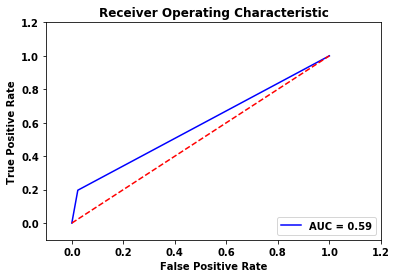

In [120]:
#roc-auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test1, X_test1['ActualVal'])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
print("ERROR METRICS")
#False Negative rate 
print("FALSE NEGATIVE RATE  :%10.2f"%((FN*100)/(FN+TP)),"%")
#accuracy
print("ACCURACY             :%10.2f"%(((TP+TN)*100)/(TP+TN+FP+FN)),"%")
#senstivity: proportion of actual positives that are correctly classified
print("SENSTIVITY           :%10.2f"%(TP*100/(TP+FN)),"%")
#specificity
print("SPECIFICITY          :%10.2f"%(TN*100/(TN+FP)),"%")
#precision
print("PRECISION            :%10.2f"%(TP*100/(TP+FP)),"%")
#recall
print("RECALL               :%10.2f"%(TP*100/(TP+FN)),"%")
#ROC-AUC
print("ROC-AUC              :%10.2f"%(roc_auc*100),"%")

ERROR METRICS
FALSE NEGATIVE RATE  :     18.30 %
ACCURACY             :     78.35 %
SENSTIVITY           :     81.70 %
SPECIFICITY          :     75.21 %
PRECISION            :     75.62 %
RECALL               :     81.70 %
ROC-AUC              :     78.45 %



<h4>KNN Classifier</h4>







In [82]:
#Load the copied dataframe to data
data=data2

In [83]:
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, Y_train)


In [84]:
X_test.shape

(462, 13)

In [85]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [86]:
#build confusion matrix
CM = pd.crosstab(Y_test, KNN_Predictions,rownames=['actual class'],colnames=['KNN predicted class'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [87]:
CM

KNN predicted class,0,1
actual class,,
0,207,31
1,40,184


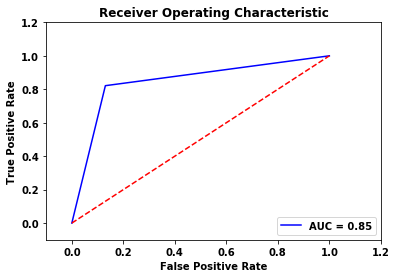

In [88]:
#roc-auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, KNN_Predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
print("ERROR METRICS")
#False Negative rate 
print("FALSE NEGATIVE RATE  :%10.2f"%((FN*100)/(FN+TP)),"%")
#accuracy
print("ACCURACY             :%10.2f"%(((TP+TN)*100)/(TP+TN+FP+FN)),"%")
#senstivity: proportion of actual positives that are correctly classified
print("SENSTIVITY           :%10.2f"%(TP*100/(TP+FN)),"%")
#specificity
print("SPECIFICITY          :%10.2f"%(TN*100/(TN+FP)),"%")
#precision
print("PRECISION            :%10.2f"%(TP*100/(TP+FP)),"%")
#recall
print("RECALL               :%10.2f"%(TP*100/(TP+FN)),"%")
#ROC-AUC
print("ROC-AUC              :%10.2f"%(roc_auc*100),"%")

ERROR METRICS
FALSE NEGATIVE RATE  :     17.86 %
ACCURACY             :     84.63 %
SENSTIVITY           :     82.14 %
SPECIFICITY          :     86.97 %
PRECISION            :     85.58 %
RECALL               :     82.14 %
ROC-AUC              :     84.56 %


<h4> Naive Bayes</h4>

In [90]:
#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, Y_train)
#predict test cases
NB_Predictions = NB_model.predict(X_test)
#Build confusion matrix
CM = pd.crosstab(Y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

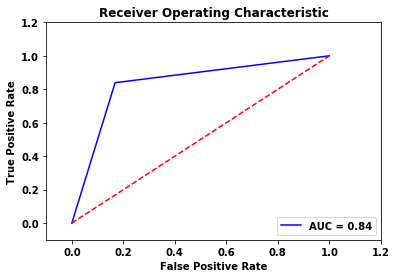

In [91]:
#roc-auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, NB_Predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
print("ERROR METRICS")
#False Negative rate 
print("FALSE NEGATIVE RATE  :%10.2f"%((FN*100)/(FN+TP)),"%")
#accuracy
print("ACCURACY             :%10.2f"%(((TP+TN)*100)/(TP+TN+FP+FN)),"%")
#senstivity: proportion of actual positives that are correctly classified
print("SENSTIVITY           :%10.2f"%(TP*100/(TP+FN)),"%")
#specificity
print("SPECIFICITY          :%10.2f"%(TN*100/(TN+FP)),"%")
#precision
print("PRECISION            :%10.2f"%(TP*100/(TP+FP)),"%")
#recall
print("RECALL               :%10.2f"%(TP*100/(TP+FN)),"%")
#ROC-AUC
print("ROC-AUC              :%10.2f"%(roc_auc*100),"%")

ERROR METRICS
FALSE NEGATIVE RATE  :     16.07 %
ACCURACY             :     83.55 %
SENSTIVITY           :     83.93 %
SPECIFICITY          :     83.19 %
PRECISION            :     82.46 %
RECALL               :     83.93 %
ROC-AUC              :     83.56 %
